In [2]:
# data manipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Abdullah Ahamed\Downloads\DS2_C5_S6_AllRent_Data_Challenge.csv')
df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   object 
 4   created          9871 non-null   object 
 5   description      9585 non-null   object 
 6   display_address  9837 non-null   object 
 7   features         9871 non-null   object 
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   object 
 12  photos           9871 non-null   object 
 13  price            9871 non-null   int64  
 14  street_address   9866 non-null   object 
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,9871.000000,9871.000000,9871.000000,9871.000000,9.871000e+03,9871.000000,9871.000000
mean,61828.973154,1.210617,1.533685,40.747167,7.024062e+06,-73.965549,3662.860804
std,35901.607107,0.501985,1.106696,0.414548,1.269108e+05,0.760686,2559.911997
min,9.000000,0.000000,0.000000,0.000000,6.812005e+06,-87.613400,43.000000
25%,30968.000000,1.000000,1.000000,40.727500,6.914494e+06,-73.992200,2499.000000
50%,61354.000000,1.000000,1.000000,40.750600,7.022816e+06,-73.978300,3125.000000
75%,93229.500000,1.000000,2.000000,40.773900,7.130978e+06,-73.955100,4047.500000
max,123995.000000,10.000000,8.000000,43.034600,7.742631e+06,0.000000,90000.000000


In [6]:
column_correlation = df.corr()
column_correlation

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
Unnamed: 0,1.000000,-0.007826,-0.024353,-0.008849,-0.855608,0.005866,-0.010804
bathrooms,-0.007826,1.000000,0.528971,0.007422,0.000749,-0.000629,0.617426
bedrooms,-0.024353,0.528971,1.000000,0.015035,0.021417,-0.008100,0.431208
latitude,-0.008849,0.007422,0.015035,1.000000,0.012773,-0.967374,0.005881
listing_id,-0.855608,0.000749,0.021417,0.012773,1.000000,-0.008984,-0.000628
longitude,0.005866,-0.000629,-0.008100,-0.967374,-0.008984,1.000000,-0.009305
price,-0.010804,0.617426,0.431208,0.005881,-0.000628,-0.009305,1.000000


In [7]:
df.dtypes

Unnamed: 0           int64
bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

In [8]:
df.shape

(9871, 16)

In [9]:
df.columns

Index(['Unnamed: 0', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'latitude', 'listing_id',
       'longitude', 'manager_id', 'photos', 'price', 'street_address',
       'interest_level'],
      dtype='object')

In [12]:
df = df.drop(["building_id","created","description","display_address","listing_id",
                     "photos","street_address","manager_id"],axis=1)

In [13]:
df.columns

Index(['Unnamed: 0', 'bathrooms', 'bedrooms', 'features', 'latitude',
       'longitude', 'price', 'interest_level'],
      dtype='object')

In [14]:
# Checking Null
df.isnull().sum()

# No Null values

Unnamed: 0        0
bathrooms         0
bedrooms          0
features          0
latitude          0
longitude         0
price             0
interest_level    0
dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='interest_level', ylabel='price'>

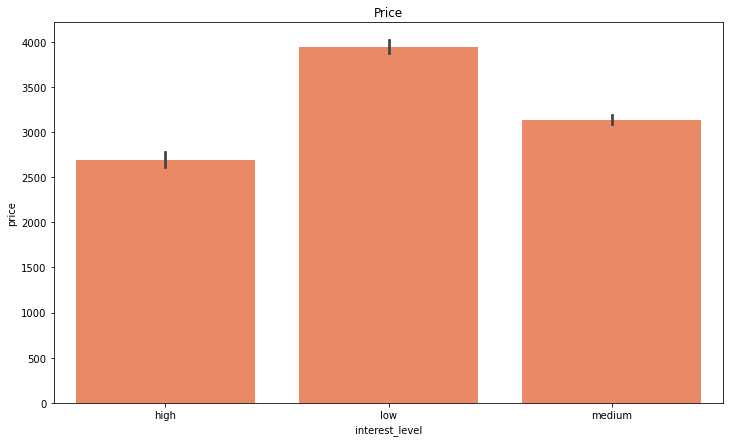

In [16]:
plt.figure(figsize=(12,7))
plt.title("Price")
sns.barplot(data= df, x="interest_level", y="price", color='coral')

#### Price is higher for low interest and lower for high interest level

<AxesSubplot:title={'center':'Price Count Vs Bedroom'}, xlabel='bedrooms', ylabel='count'>

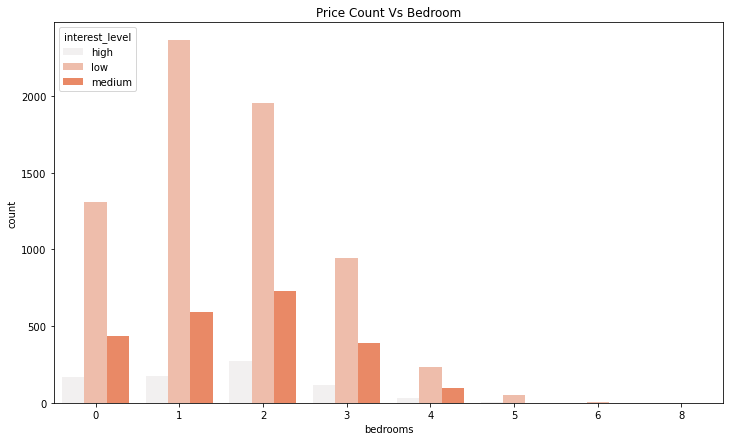

In [17]:
plt.figure(figsize=(12,7))
plt.title("Price Count Vs Bedroom")
sns.countplot(data= df, hue="interest_level", x="bedrooms", color='coral')

#### High interest has the highest count in 2 bedroom 
#### Low interest has the highest count in 1 bedroom
#### Medium int has highest in no bedroom

<AxesSubplot:title={'center':'Bathroom'}, xlabel='bathrooms', ylabel='count'>

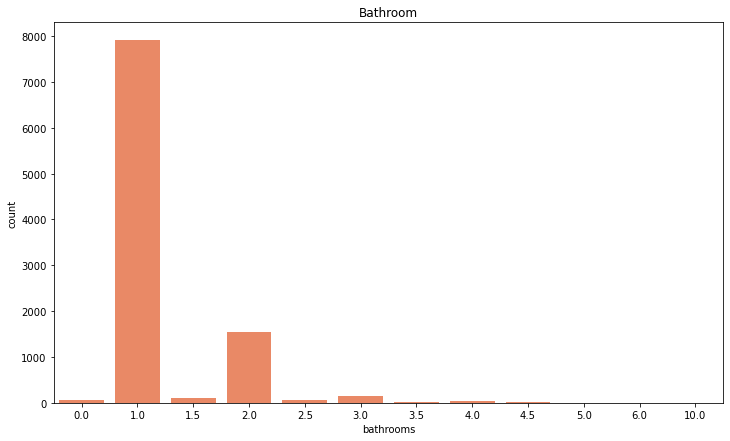

In [18]:
plt.figure(figsize=(12,7))
plt.title("Bathroom")
sns.countplot(data= df, x="bathrooms", color='coral')

#### Interpretation Most homes have atleast one bathroom which is a necessity

In [19]:
col = ['features', 'interest_level']

for i in col:
    df[i]= df[i].astype('category')
    
# Label encoding
for ii in col:
    label_encoder= preprocessing.LabelEncoder()
    df[ii]= label_encoder.fit_transform(df[ii])

#### Encoded DF

In [20]:
df

,Unnamed: 0,bathrooms,bedrooms,features,latitude,longitude,price,interest_level
0,105408,1.0,0,169,40.7672,-73.9802,2800,0
1,110219,1.0,1,320,40.7483,-73.9741,2100,0
2,56113,1.0,1,1599,40.7399,-73.9812,3000,0
3,37765,1.0,2,959,40.7530,-73.9958,3000,0
4,67397,1.0,2,656,40.7695,-73.9603,3300,0
...,...,...,...,...,...,...,...,...
9866,100591,1.0,0,2322,40.7590,-73.9621,2000,2
9867,86449,1.0,2,365,40.7187,-73.9919,3590,2
9868,44736,1.0,1,1603,40.8002,-73.9656,3000,2
9869,100906,1.0,0,1690,40.7383,-74.0006,2525,2


<AxesSubplot:>

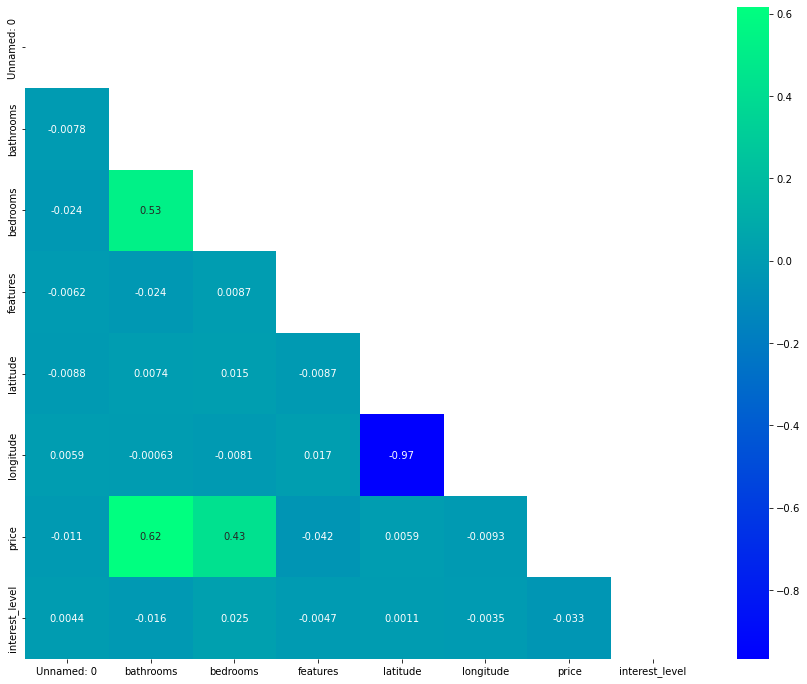

In [21]:
cor= df.corr()

mask = np.triu(np.ones_like(df.corr()))

plt.figure(figsize=(15,12))
sns.heatmap(cor, mask=mask, annot=True, cmap='winter')

#### Interpretation Price is highly related to no of bathrooms in homes and Unnamed column is not a useful feature

In [22]:
df.drop('Unnamed: 0',axis=1)

,bathrooms,bedrooms,features,latitude,longitude,price,interest_level
0,1.0,0,169,40.7672,-73.9802,2800,0
1,1.0,1,320,40.7483,-73.9741,2100,0
2,1.0,1,1599,40.7399,-73.9812,3000,0
3,1.0,2,959,40.7530,-73.9958,3000,0
4,1.0,2,656,40.7695,-73.9603,3300,0
...,...,...,...,...,...,...,...
9866,1.0,0,2322,40.7590,-73.9621,2000,2
9867,1.0,2,365,40.7187,-73.9919,3590,2
9868,1.0,1,1603,40.8002,-73.9656,3000,2
9869,1.0,0,1690,40.7383,-74.0006,2525,2


In [25]:
cor= abs(df.corr())
cor['interest_level'].sort_values(ascending=False)

interest_level    1.000000
price             0.033093
bedrooms          0.025165
bathrooms         0.016047
features          0.004720
Unnamed: 0        0.004446
longitude         0.003506
latitude          0.001149
Name: interest_level, dtype: float64

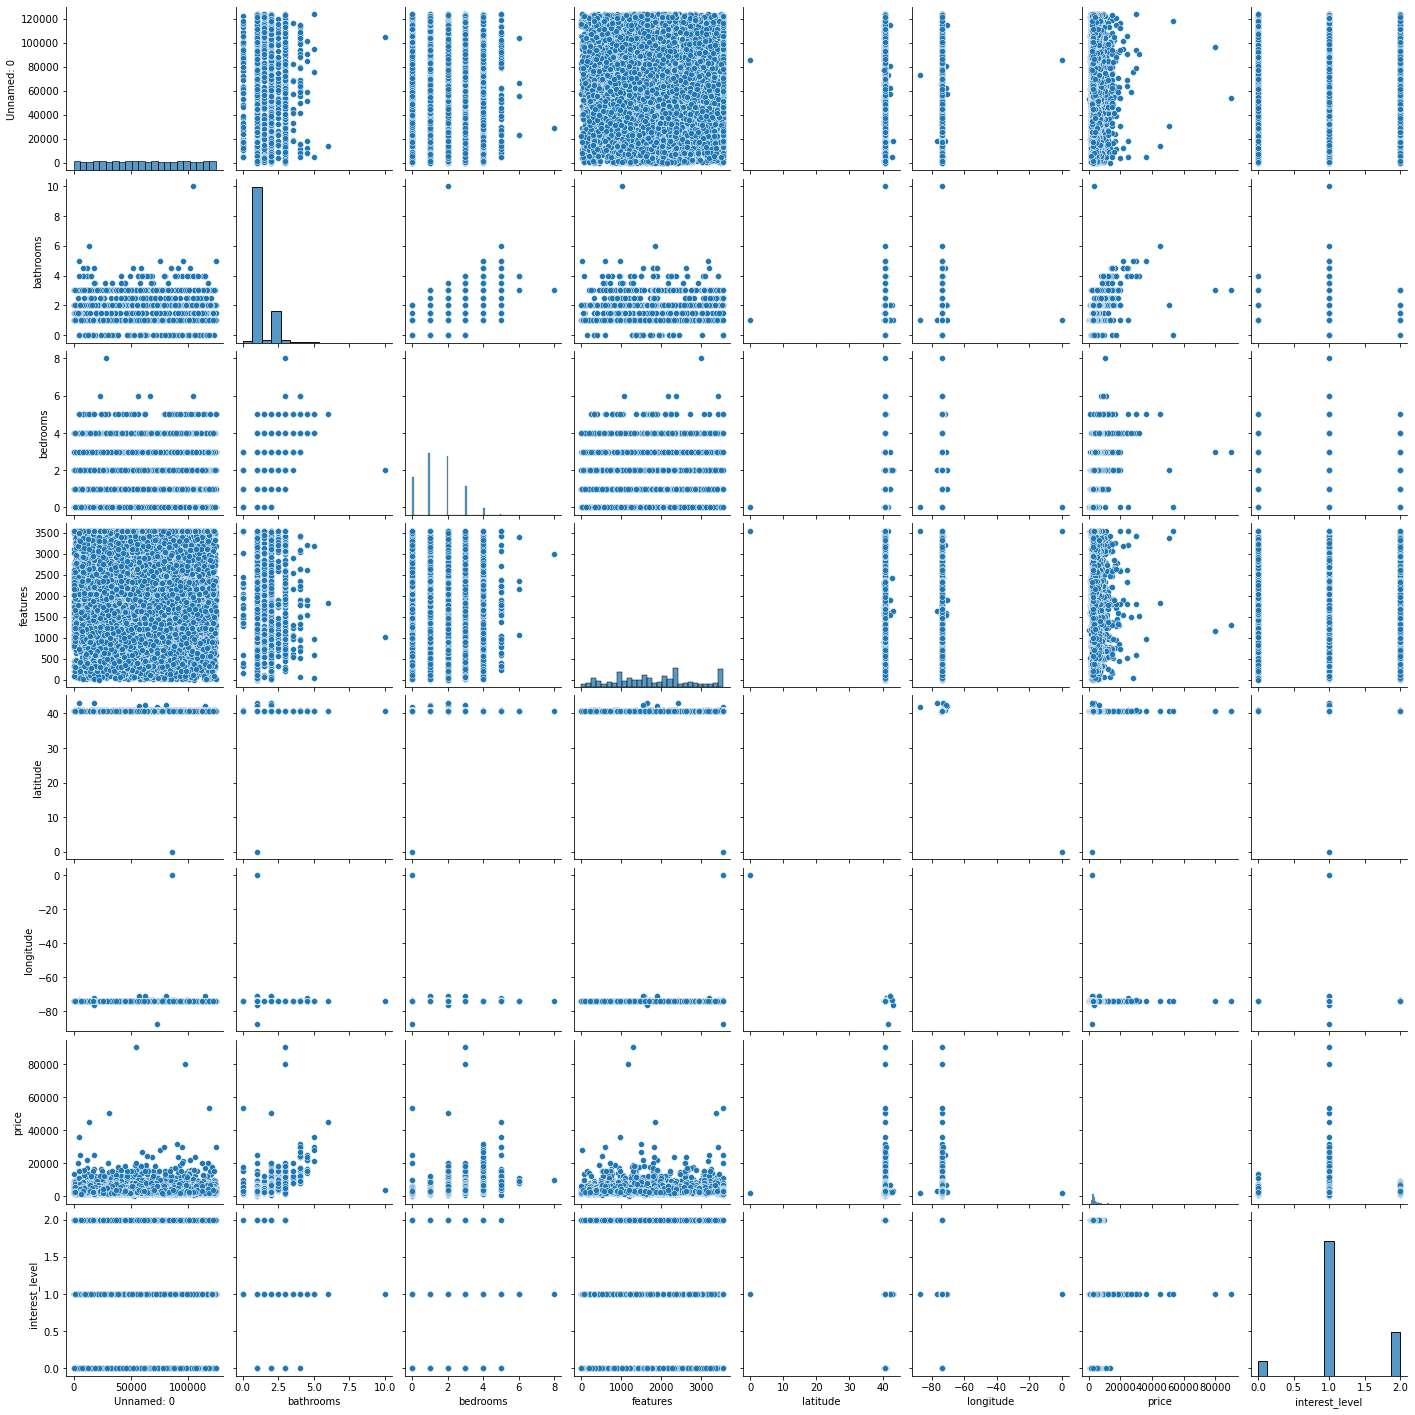

In [27]:
sns.pairplot(df)

### Hold out

In [28]:
from sklearn.model_selection import train_test_split #For splitting

X= np.array(df.drop(columns='interest_level',axis=1))
Y= np.array(df['interest_level'])

In [29]:
X

array([[ 1.05408e+05,  1.00000e+00,  0.00000e+00, ...,  4.07672e+01,
        -7.39802e+01,  2.80000e+03],
       [ 1.10219e+05,  1.00000e+00,  1.00000e+00, ...,  4.07483e+01,
        -7.39741e+01,  2.10000e+03],
       [ 5.61130e+04,  1.00000e+00,  1.00000e+00, ...,  4.07399e+01,
        -7.39812e+01,  3.00000e+03],
       ...,
       [ 4.47360e+04,  1.00000e+00,  1.00000e+00, ...,  4.08002e+01,
        -7.39656e+01,  3.00000e+03],
       [ 1.00906e+05,  1.00000e+00,  0.00000e+00, ...,  4.07383e+01,
        -7.40006e+01,  2.52500e+03],
       [ 1.11796e+05,  1.00000e+00,  0.00000e+00, ...,  4.07391e+01,
        -7.39936e+01,  3.00000e+03]])

In [30]:
Y

array([0, 0, 0, ..., 2, 2, 2])

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

### Building Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

#Creating model
dft = DecisionTreeClassifier().fit(x_train,y_train)

#Prediction
y_pred= dft.predict(x_test)
y_pred

array([2, 2, 0, ..., 1, 0, 1])

In [37]:
a_train= round(dft.score(x_train,y_tain)*100, 2)
print("Train Accuracy: ", a_train)

a_test= round(dft.score(x_test,y_test)*100,2)
print("Test Accuracy: ",a_test)

Train Accuracy:  100.0
Test Accuracy:  62.38


### KFold Classifier

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import std
model = DecisionTreeClassifier() # define the model 

# evaluate the model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores1 = cross_validate(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores1

# report performance

print('Accuracy-Score: %.3f (%.3F)' % (mean(n_scores1['test_score']), std (n_scores1['test_score'])))

Accuracy-Score: 0.612 (0.020)


#### Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
modal= RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25)
modal.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25)

In [46]:
y_pred1= modal.predict(x_test)
y_pred1

array([1, 1, 1, ..., 1, 2, 1])

In [47]:
print(modal.score(x_train,y_train))
print(modal.score(x_test,y_test))

0.817629179331307
0.7048101265822785


#### Interpretation Random Forest has the hughest accuracy and is an efficient modal